<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Naive Bayes(Social media ADs Dataset)</h3>

<img src = "https://machinelearningmastery.com/wp-content/uploads/2014/12/naive-bayes-classifier.jpg" width=50%>

- [ ] What is Naive Bayes?
- [ ] Social Media ADs Dataset
- [ ] Label Encoding with Sklearn
- [ ] Feature Scaling with Sklearn
- [ ] Training the model
- [ ] Model Evaluation

## What is Naive Bayes?

Naive Bayes is a **classification** algorithm that works based on the Bayes theorem. Before explaining about Naive Bayes, first, we should discuss Bayes Theorem. Bayes theorem is used to find the probability of a hypothesis with given evidence.

<img src = "https://editor.analyticsvidhya.com/uploads/34725nv1.png" width=50%>

In this, using Bayes theorem we can find the probability of A, given that B occurred.

> A is the hypothesis and B is the evidence.

> P(B|A) is the probability of B given that A is True.

> P(A) and P(B) is the independent probabilities of A and B.

## The concept behind the algorithm

Let’s understand the concept of the Naive Bayes Theorem through an example. We are taking a dataset of employees in a company, our aim is to create a model to find whether a person is going to the office by driving or walking using salary and age of the person.

<img src = "https://editor.analyticsvidhya.com/uploads/75704nv3.png" width=50%>

* Note that we are taken age on the X-axis and Salary on the Y-axis. 

In the above, we can see 30 data points in which red points belong to those who are walking and green belongs to those who are driving.

<img src = "https://editor.analyticsvidhya.com/uploads/60483nv4.png" width=50%>

Now let’s add a new data point into it. Our aim is to find the category that the new point belongs to.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

- [x] What is Naive Bayes?
- [ ] Social Media ADs Dataset
- [ ] Label Encoding with Sklearn
- [ ] Feature Scaling with Sklearn
- [ ] Training the model
- [ ] Model Evaluation

We are using the Social network ad dataset. The dataset contains the details of users in a social networking site to find whether a user buys a product by clicking the ad on the site based on their salary, age, and gender.

In [2]:
df = pd.read_csv("./data/social_network_ads.csv")

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [9]:
pd.crosstab(df.Gender,df.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [10]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [11]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


| Question                  | Answer
| :---                      | :----:   
| Number of Instances       | 400       
| Number of Features        | 3
| Class Distribution        | 257 No, 143 Yes
| Number of Missing Values  | 0       
| Number of Classes         | 2       
| Task                      | Classification 

## X,y Seletction from dataframe

In [12]:
X = df.iloc[:, [1, 2, 3]]
y = df.iloc[:, -1]

In [13]:
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

- [x] What is Naive Bayes?
- [x] Social Media ADs Dataset
- [ ] Label Encoding with Sklearn
- [ ] Feature Scaling with Sklearn
- [ ] Training the model
- [ ] Model Evaluation

## LabelEncoder 

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [16]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


# correlation and Pair plots

In [17]:
le_prime = LabelEncoder()
df['Gender'] = le_prime.fit_transform(df['Gender'])

In [18]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [19]:
corr =df.corr()

In [20]:
corr

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [21]:
corr.shape

(5, 5)

<AxesSubplot: >

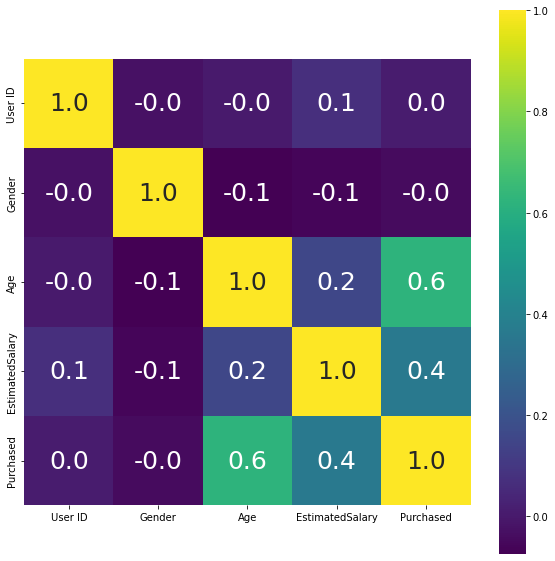

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square = True,fmt="0.1f",annot = True,annot_kws={"size" : 25},cmap="viridis")

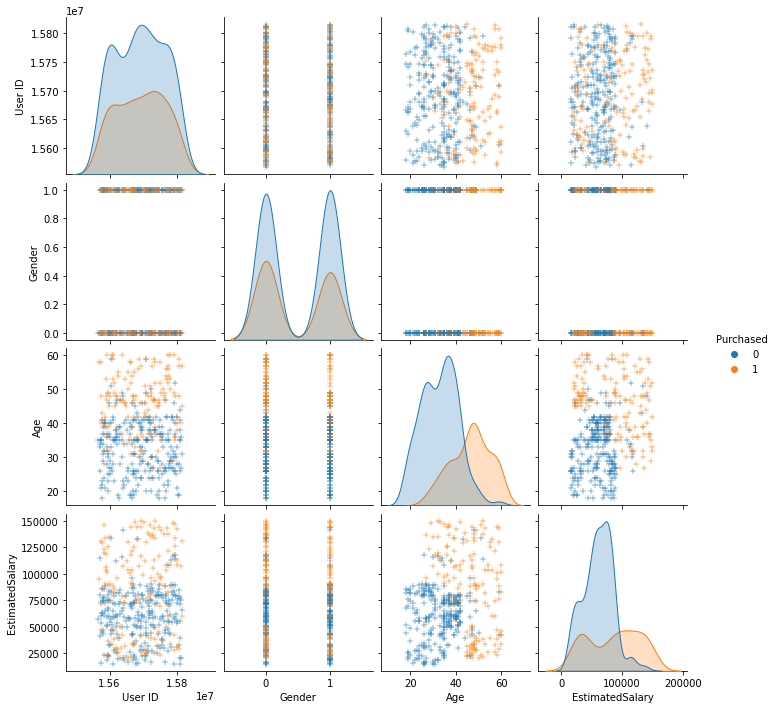

In [23]:
graph = sns.pairplot(df,hue = "Purchased", markers="+")
plt.show() 

# plots

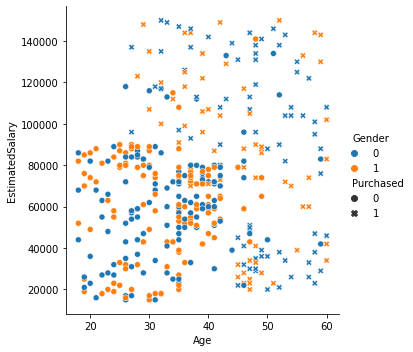

In [24]:
sns.relplot(x="Age",y="EstimatedSalary",hue = "Gender",style ="Purchased" ,data= df)

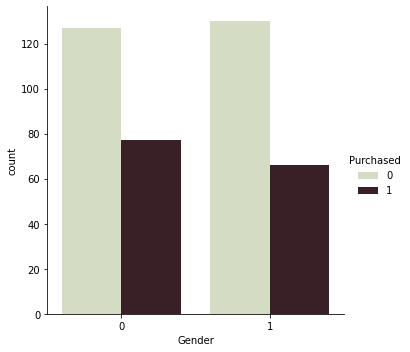

In [25]:
sns.catplot(x="Gender",hue="Purchased",kind="count",palette="ch:0.60",data = df)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

- [x] What is Naive Bayes?
- [x] Social Media ADs Dataset
- [x] Label Encoding with Sklearn
- [ ] Feature Scaling with Sklearn
- [ ] Training the model
- [ ] Model Evaluation

## Feature Scaling

In [41]:
X_train.head(10)

,Gender,Age,EstimatedSalary
336,1,58,144000
64,0,59,83000
55,0,24,55000
106,0,26,35000
300,0,58,38000
229,0,42,80000
122,0,40,75000
373,1,59,130000
395,0,46,41000
325,0,41,60000


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_prime = sc.fit_transform(X_train)
X_test_prime = sc.transform(X_test)

In [31]:
X_train_prime[0]

array([1.02532046, 1.92295008, 2.14601566])

- [x] What is Naive Bayes?
- [x] Social Media ADs Dataset
- [x] Label Encoding with Sklearn
- [x] Feature Scaling with Sklearn
- [ ] Training the model
- [ ] Model Evaluation

## Training Model

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier_prime = GaussianNB()
classifier_prime.fit(X_train_prime, y_train)

GaussianNB()

In [33]:
y_pred_prime =  classifier_prime.predict(X_test_prime)

In [34]:
y_pred_prime

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

- [x] What is Naive Bayes?
- [x] Social Media ADs Dataset
- [x] Label Encoding with Sklearn
- [x] Feature Scaling with Sklearn
- [x] Training the model
- [ ] Model Evaluation

# Model Evaluation

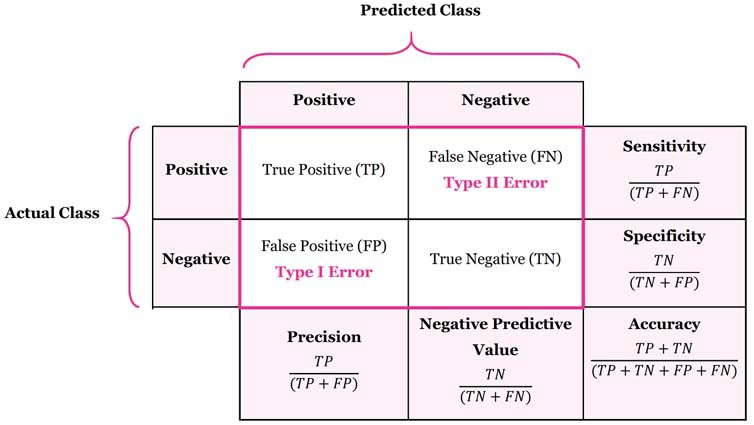 

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_prime = confusion_matrix(y_test, y_pred_prime)
print(cm_prime)

[[56  2]
 [ 4 18]]


<AxesSubplot: >

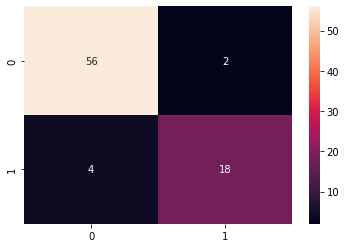

In [36]:
sns.heatmap(cm_prime,annot=True)

In [37]:
accuracy= accuracy_score(y_test,y_pred_prime)
accuracy

0.925

# introducing CountVectorizer and TfidfVectorizer

In [38]:
sample = ['hello how are you are you okay ',
          'you are students']

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [40]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

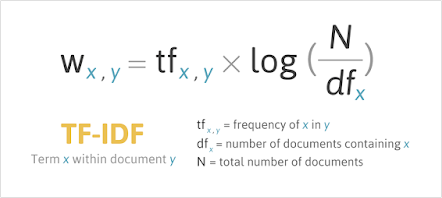

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,are,hello,how,okay,students,you
0,0.535941,0.376623,0.376623,0.376623,0.000000,0.535941
1,0.501549,0.000000,0.000000,0.000000,0.704909,0.501549


# Classifying Text with Multinomial Naive Bayes

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data= fetch_20newsgroups()

In [ ]:
data

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [ ]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print(train.data[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(train.data, train.target)
label = model.predict(test.data)

<AxesSubplot:>

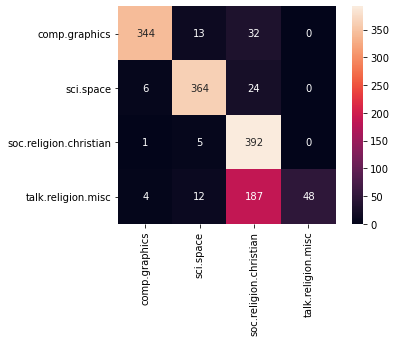

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test.target, label)
sns.heatmap(cm,square=True, annot=True,fmt="d",
            xticklabels=train.target_names, yticklabels=train.target_names)

In [ ]:
def predict_category(x, train=train, model=model):
    pred = model.predict([x])
    return train.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')

'sci.space'

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'